In [30]:
# importing libraries needed
import os
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [31]:
# mnist data loading
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


In [32]:
# printing shape of the xtrain and y_train
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [33]:
dictionary={0 : 'airplane', 1:'automobile' ,2 : 'bird',  3:'cat',
 4:'deer',
 5:'dog ',
 6: 'frog',
 7: 'horse',
 8:'ship',
 9:'truck'}

In [34]:
# scaling x_train and x_test data
x_train = x_train/255 
x_test  = x_test /255

In [35]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape,y_test.shape

((50000,), (10000,))

The value expected to be-> truck


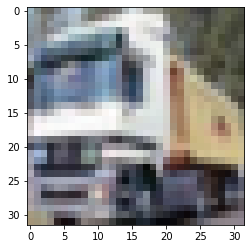

In [36]:
print("The value expected to be->",dictionary[y_train[1]])
plt.imshow(x_train[1])

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [37]:

print("Y_train unique values: ",sorted(pd.Series(y_train).unique()),
      "\nY_train Number Unique values:",len(sorted(pd.Series(y_train).unique()))
     )

print("\n\nY_test unique values: ",sorted(pd.Series(y_test).unique()),
      "\nY_test Number Unique values:",len(sorted(pd.Series(y_test).unique()))
     )

Y_train unique values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
Y_train Number Unique values: 10


Y_test unique values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
Y_test Number Unique values: 10


In [38]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)


In [39]:
#getting maximum and minimum values of x_train and x_test respectivley
x_train.max(),x_test.max(),x_train.min(),x_test.min()

(1.0, 1.0, 0.0, 0.0)

In [40]:
# printing shape of the xtrain and y_train
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [41]:
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

In [42]:
print(y_train[1])
y_train_cat

9


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
#building a sequential model
model = Sequential()
    
model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)))    
model.add(Dropout(0.2))
    
model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
model.add(Dropout(0.5))
    
model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
model.add(Dropout(0.5))    
    
model.add(Conv2D(192, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1),padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(10, (1, 1), padding='valid'))

model.add(GlobalAveragePooling2D())
    
model.add(Activation('softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

es =  EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 192)      

In [45]:
model.fit(x=x_train,y=y_train_cat,epochs=300,callbacks=[es],validation_data=(x_test,y_test_cat),batch_size=(64))

Epoch 1/300
782/782 [==============================] - 29s 37ms/step - loss: 1.8440 - accuracy: 0.2948 - val_loss: 1.4838 - val_accuracy: 0.4501
Epoch 2/300
782/782 [==============================] - 28s 36ms/step - loss: 1.4093 - accuracy: 0.4811 - val_loss: 1.2587 - val_accuracy: 0.5426
Epoch 3/300
782/782 [==============================] - 28s 36ms/step - loss: 1.1766 - accuracy: 0.5738 - val_loss: 1.0813 - val_accuracy: 0.6055
Epoch 4/300
782/782 [==============================] - 28s 36ms/step - loss: 1.0106 - accuracy: 0.6386 - val_loss: 0.9257 - val_accuracy: 0.6758
Epoch 5/300
782/782 [==============================] - 28s 36ms/step - loss: 0.8978 - accuracy: 0.6828 - val_loss: 0.9137 - val_accuracy: 0.6819
Epoch 6/300
782/782 [==============================] - 28s 36ms/step - loss: 0.8184 - accuracy: 0.7124 - val_loss: 0.7324 - val_accuracy: 0.7427
Epoch 7/300
782/782 [==============================] - 28s 36ms/step - loss: 0.7556 - accuracy: 0.7333 - val_loss: 0.7166 - val_ac

In [58]:
history = pd.DataFrame(model.history.history)
print(history)

Empty DataFrame
Columns: []
Index: []


In [60]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.5713 - accuracy: 0.8214


[0.571265459060669, 0.821399986743927]

In [61]:
model.evaluate(x_train,y_train_cat)

1563/1563 [==============================] - 10s 6ms/step - loss: 0.2457 - accuracy: 0.9140


[0.24565093219280243, 0.9139999747276306]

In [62]:
predictions = model.predict_classes(x_test)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.91      0.92      0.92      1000
           2       0.81      0.68      0.74      1000
           3       0.66      0.69      0.67      1000
           4       0.72      0.88      0.79      1000
           5       0.68      0.81      0.74      1000
           6       0.92      0.78      0.85      1000
           7       0.90      0.84      0.87      1000
           8       0.90      0.92      0.91      1000
           9       0.92      0.85      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[843,   5,  34,  25,  14,   5,   6,  10,  45,  13],
       [  7, 920,   2,   5,   4,   6,   2,   0,  14,  40],
       [ 41,   1, 680,  58, 103,  68,  24,  14,   8,   3],
       [ 15,   0,  32, 688,  51, 171,  22,  15,   3,   3],
       [  5,   0,  22,  29, 881,  32,   5,  25,   1,   0],
       [  3,   0,  15, 110,  37, 810,   4,  19,   2,   0],
       [  4,   1,  31,  60,  85,  27, 783,   4,   3,   2],
       [  7,   0,  14,  42,  36,  56,   1, 843,   0,   1],
       [ 31,  11,   4,  11,   6,   6,   3,   1, 918,   9],
       [ 16,  68,   2,  20,   7,   8,   3,   6,  22, 848]])

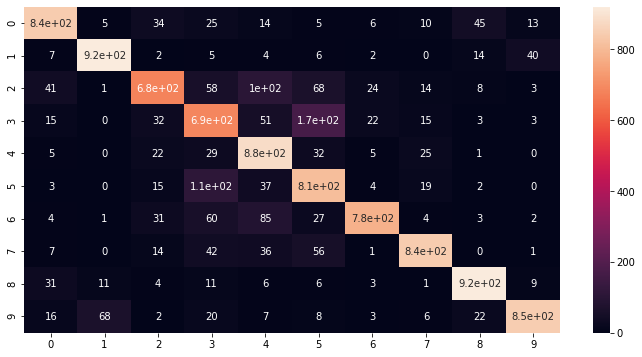

In [67]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True)

In [ ]:
###  Testing through images

In [68]:
def testing(num): 
  img=x_train[num].reshape(-1,32,32,3)
  prediction = model.predict_classes(img)
  print("Prediction: ", dictionary[prediction[0]])
  print("Original: ",dictionary[y_train[num]])
  
  plt.imshow(x_train[num])

Prediction:  automobile
Original:  automobile


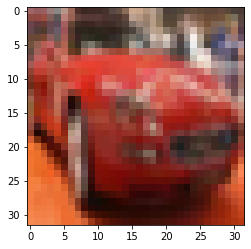

In [70]:
testing(5)